<a href="https://colab.research.google.com/github/guidomoor/FEA-ML/blob/main/Normalized_NN_for_Ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ke prediction**

the dataframe is extracted from single element simulations where multiple nodes are being displaced (here in the picture nodes 3 and 4). The element is a 2D plain stress element fully integrated:

4--------3
         
1--------2


*   Input: COORD is a 8x1 array = [coord11, coord12, coord21, coord22, ..., coord44]
*   Output: Ke is a 36x1 array = [K11, K21, ..., K88]

In total is therefore a 8 inputs - 36 outputs system

In [152]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
 #Create a model that inherits nn.Module
 class Model(nn.Module):
  #Input Layer (4 features of flower) -->
  #Hidden Layer 1 (#of neurons) -->
  #H2 --> Output
  #(3 classes of flowers)
  def __init__(self, in_features=8, h1=64, h2=128, h3= 64, out_features=36):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  #this function is pushing the information forward through the layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectify linear unit function relu
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [154]:
torch.manual_seed(42)
model = Model()

In [155]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
    my_df = pd.read_csv(filename, header=None)  # Read the CSV file into a DataFrame


Saving NN_for_Ke_Normalized.csv to NN_for_Ke_Normalized (8).csv
Uploaded file: NN_for_Ke_Normalized (8).csv


In [156]:
my_df


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.172414,-0.172414,0.127698,0.053878,...,-0.003381,0.090106,-0.003381,-0.066312,0.025918,-0.023404,-0.008451,-0.000390,-0.014086,0.090106
1,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.172414,-0.344828,0.120327,0.042350,...,-0.006336,0.127349,0.005709,-0.058982,0.027888,-0.030692,-0.011407,-0.007206,-0.022190,0.096880
2,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.344828,-0.172414,0.154200,0.059831,...,-0.002337,0.078735,-0.007496,-0.043332,0.025222,-0.014937,-0.007407,-0.013090,-0.010319,0.071360
3,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.344828,-0.344828,0.140562,0.049874,...,-0.004571,0.111801,-0.000119,-0.037356,0.026712,-0.022692,-0.009642,-0.019206,-0.016950,0.079254
4,0.172414,-0.344828,0.172414,-0.172414,0.344828,0.172414,-0.172414,-0.172414,0.064614,0.030521,...,-0.010519,0.108189,0.015045,-0.046025,0.030677,-0.032380,-0.015590,-0.004674,-0.030132,0.083079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,0.344828,-0.351724,0.344828,-0.165517,0.337931,0.372414,-0.172414,-0.400000,0.089053,0.031398,...,-0.007099,0.124843,0.012582,-0.060990,0.031208,-0.037773,-0.012169,0.000230,-0.031621,0.098533
2269,0.344828,-0.351724,0.344828,-0.165517,0.337931,0.372414,-0.344828,-0.227586,0.105155,0.045127,...,-0.003006,0.083825,0.001154,-0.047474,0.028210,-0.026440,-0.008077,-0.003246,-0.021286,0.077161
2270,0.172414,-0.179310,0.172414,-0.441379,0.337931,0.200000,-0.344828,-0.227586,0.097174,0.018774,...,0.012478,0.090825,-0.003925,-0.032143,0.040169,-0.076353,0.007407,0.011048,-0.043651,0.097447
2271,0.172414,-0.179310,0.172414,-0.165517,0.337931,0.200000,-0.172414,-0.227586,0.079446,0.024968,...,-0.002779,0.137212,0.011650,-0.031536,0.036774,-0.049915,-0.007850,-0.007450,-0.040574,0.088901


In [157]:
# Assuming my_df has 44 columns
X = my_df.iloc[:, :8]  # Select the first 8 columns (Coord): input
y = my_df.iloc[:, 8:]   # Select the last 36 columns (Ke): output
#convert to numpy arrays
#Data used in the NN
X = X.values
y = y.values

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
#Train Test Slip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [160]:
# Convert your datasets to PyTorch tensors
X_train = torch.FloatTensor(X_train)  # Inputs should be Float
X_test = torch.FloatTensor(X_test)    # Inputs should be Float

# If y_train and y_test are initially NumPy arrays
y_train = np.array(y_train, dtype=float)  # Ensure they are float arrays
y_test = np.array(y_test, dtype=float)    # Ensure they are float arrays

# Convert to PyTorch FloatTensor
y_train = torch.FloatTensor(y_train)  # Convert to FloatTensor
y_test = torch.FloatTensor(y_test)    # Convert to FloatTensor



In [161]:
print(f'X train: {X_train}')
print(f'X test: {X_test}')
print(f'y train: {y_train}')
print(f'y test: {y_test}')

X train: tensor([[ 0.4345, -0.6069,  0.4345,  ...,  0.6069, -0.4345, -0.6069],
        [ 0.5793, -0.5793,  0.5793,  ...,  0.3517, -0.5793, -0.5793],
        [ 0.8276, -1.0000,  0.8276,  ...,  0.8276, -0.8276, -0.8276],
        ...,
        [ 0.8276, -0.8276,  0.8276,  ...,  1.0000, -1.0000, -1.0000],
        [ 0.8621, -0.1724,  0.8621,  ...,  0.8621, -0.8621, -0.1724],
        [ 0.7931, -0.7931,  0.7931,  ...,  0.7931, -0.6207, -0.6207]])
X test: tensor([[ 0.1724, -0.1793,  0.1724,  ...,  0.3724, -0.1724, -0.2276],
        [ 0.8621, -0.1724,  0.8621,  ...,  0.8621, -0.1724, -0.8621],
        [ 0.7931, -0.7931,  0.7931,  ...,  0.6207, -0.7931, -0.7931],
        ...,
        [ 0.8276, -0.8276,  0.8276,  ...,  1.0000, -0.8276, -1.0000],
        [ 0.6207, -0.6207,  0.6207,  ...,  0.7931, -0.6207, -0.7931],
        [ 0.3517, -0.3517,  0.3517,  ...,  0.3517, -0.3517, -0.3517]])
y train: tensor([[ 0.0997,  0.0330,  0.0997,  ...,  0.0106, -0.0330,  0.0997],
        [ 0.0838,  0.0330,  0.1032, 

**Normalized Dataset Z-norm**

In [162]:
#Set the criterion of model to measure the error
criterion = nn.MSELoss()  # Use MSE loss for regression
#Choose an Optimizer - Adam Optimizer, learning rate (lr).
#learning rate is used in case the error does not go down
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [163]:
#Train the model:
# Epochs: (one run through all the training data in the network)
epochs = 350
losses = []

for i in range(epochs):
    # Forward pass: use normalized X_train as input
    y_pred = model.forward(X_train)  # Use normalized inputs

    # Measure the loss/error using normalized y_train
    loss = criterion(y_pred, y_train)  # Compare with normalized targets

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # Print the losses (for tracking training progress)
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    # Backpropagation: update the model's weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.011801465414464474
Epoch: 10 Loss: 0.0004756289126817137
Epoch: 20 Loss: 0.00037443937617354095
Epoch: 30 Loss: 0.0002837857464328408
Epoch: 40 Loss: 0.00022276671370491385
Epoch: 50 Loss: 0.0001700499269645661
Epoch: 60 Loss: 0.00013258366379886866
Epoch: 70 Loss: 0.00013633858179673553
Epoch: 80 Loss: 9.555752330925316e-05
Epoch: 90 Loss: 7.565702253486961e-05
Epoch: 100 Loss: 6.0413363826228306e-05
Epoch: 110 Loss: 4.820241520064883e-05
Epoch: 120 Loss: 3.472800017334521e-05
Epoch: 130 Loss: 3.0237129976740107e-05
Epoch: 140 Loss: 2.5012801415869035e-05
Epoch: 150 Loss: 2.0147519535385072e-05
Epoch: 160 Loss: 1.778258229023777e-05
Epoch: 170 Loss: 1.63675140356645e-05
Epoch: 180 Loss: 1.5391175111290067e-05
Epoch: 190 Loss: 1.5258586245181505e-05
Epoch: 200 Loss: 1.4568835467798635e-05
Epoch: 210 Loss: 1.3843514352629427e-05
Epoch: 220 Loss: 1.2929730473842937e-05
Epoch: 230 Loss: 1.2570139915624168e-05
Epoch: 240 Loss: 1.2054280887241475e-05
Epoch: 250 Loss: 1.3873

Text(0.5, 0, 'Epoch')

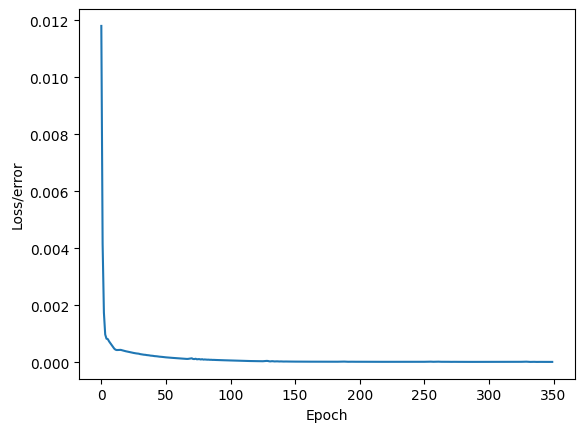

In [164]:
#Plot Loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [165]:
# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Get predictions
    y_preds = model(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = torch.mean(torch.abs(y_preds - y_test))
    print(f'MAE: {mae.item():.4f}')

    # Calculate Mean Squared Error (MSE)
    mse = torch.mean((y_preds - y_test) ** 2)
    print(f'MSE: {mse.item():.4f}')

    # Calculate R-squared
    ss_total = torch.sum((y_test - torch.mean(y_test)) ** 2)
    ss_residual = torch.sum((y_test - y_preds) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared.item():.4f}')


MAE: 0.0020
MSE: 0.0000
R-squared: 0.9940


In [166]:
new_input = torch.tensor([[0.25, -0.5, 0.25, -0.25, 0.25, 0.5, -0.25, -0.25]])
max_norm = 487593.39642782

# Disable gradient calculation
with torch.no_grad():
    model.eval()
    # Prediction for new input
    y_pred = model(new_input)
    y_pred_real = y_pred * max_norm
    print(f'Prediction: {y_pred_real}')


    # Print the denormalized prediction
    print(f' Prediction: {y_pred}')


Prediction: tensor([[ 62274.9492,  24090.0469,  61146.2656, -24260.1582,    457.2696,
          27726.5332,  -2356.2791,   9687.1621,  -7454.8188,  26313.8359,
         -38651.7734, -19517.1973,   8312.9521,  -2317.7153,  62791.9922,
         -19337.5977, -36897.3047,  -3463.6919, -23624.5957,  24630.1230,
          59426.9688,   1046.7299,  -3919.5298, -11868.6562,  11329.2490,
         -33313.7383,   -441.9857,  44646.4805,  -1852.8772, -33007.0078,
          11981.2666, -11475.6113,  -2625.8660,   -632.6932,  -7227.6440,
          43870.4023]])
 Prediction: tensor([[ 0.1277,  0.0494,  0.1254, -0.0498,  0.0009,  0.0569, -0.0048,  0.0199,
         -0.0153,  0.0540, -0.0793, -0.0400,  0.0170, -0.0048,  0.1288, -0.0397,
         -0.0757, -0.0071, -0.0485,  0.0505,  0.1219,  0.0021, -0.0080, -0.0243,
          0.0232, -0.0683, -0.0009,  0.0916, -0.0038, -0.0677,  0.0246, -0.0235,
         -0.0054, -0.0013, -0.0148,  0.0900]])


In [167]:
# Extracting all weights and biases
for name, param in model.named_parameters():
    if param.requires_grad:  # Only if you want trainable parameters
        print(f'Layer: {name}, Weights: {param.data.numpy()}')


Layer: fc1.weight, Weights: [[ 1.39287293e-01  1.25604365e-02 -2.13845730e-01  3.14243287e-01
  -5.61293215e-02  1.80142894e-01 -4.14763451e-01  4.03867453e-01]
 [ 2.75686026e-01 -2.38424987e-01  2.71320760e-01  6.62831590e-02
   1.95673451e-01  2.76951548e-02  1.43200547e-01 -4.14171256e-02]
 [ 2.72549301e-01  5.22583388e-02 -1.65052831e-01  9.01201591e-02
  -1.62894994e-01 -4.14622128e-02 -1.43598646e-01  2.34537050e-01]
 [-3.43618006e-01 -9.08684582e-02 -1.64368257e-01 -1.43196762e-01
  -3.96747626e-02 -4.13730770e-01  3.83830756e-01 -2.30947211e-01]
 [ 2.55129337e-01  7.43443370e-02 -1.32623911e-01  2.23474041e-01
   2.65778583e-02  2.79181778e-01  1.81519873e-02 -8.57666656e-02]
 [ 2.61063695e-01 -3.37587446e-01  3.14865440e-01  1.98291600e-01
   3.85111362e-01 -1.22853942e-01  1.27384542e-02 -5.83188720e-02]
 [ 7.89033473e-02 -1.18349656e-01 -4.50628638e-01  6.25691861e-02
  -3.72661322e-01  2.91258633e-01  1.93576321e-01  2.12904319e-01]
 [ 3.46902981e-02  1.55164316e-01  1.9956

In [168]:
# Access weights directly from each layer
weights_fc1 = model.fc1.weight.data.numpy()
weights_fc2 = model.fc2.weight.data.numpy()
#weights_fc3 = model.fc3.weight.data.numpy()
weights_out = model.out.weight.data.numpy()

print("Weights from fc1:", weights_fc1)
#print("Weights from fc2:", weights_fc2)
#print("Weights from fc3:", weights_fc3)
#print("Weights from output layer:", weights_out)

# Save weights to text files
#np.savetxt('weights_fc1.txt', weights_fc1, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc2.txt', weights_fc2, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc3.txt', weights_fc3, fmt='%.6f', delimiter=',')
#np.savetxt('weights_output.txt', weights_out, fmt='%.6f', delimiter=',')

Weights from fc1: [[ 1.39287293e-01  1.25604365e-02 -2.13845730e-01  3.14243287e-01
  -5.61293215e-02  1.80142894e-01 -4.14763451e-01  4.03867453e-01]
 [ 2.75686026e-01 -2.38424987e-01  2.71320760e-01  6.62831590e-02
   1.95673451e-01  2.76951548e-02  1.43200547e-01 -4.14171256e-02]
 [ 2.72549301e-01  5.22583388e-02 -1.65052831e-01  9.01201591e-02
  -1.62894994e-01 -4.14622128e-02 -1.43598646e-01  2.34537050e-01]
 [-3.43618006e-01 -9.08684582e-02 -1.64368257e-01 -1.43196762e-01
  -3.96747626e-02 -4.13730770e-01  3.83830756e-01 -2.30947211e-01]
 [ 2.55129337e-01  7.43443370e-02 -1.32623911e-01  2.23474041e-01
   2.65778583e-02  2.79181778e-01  1.81519873e-02 -8.57666656e-02]
 [ 2.61063695e-01 -3.37587446e-01  3.14865440e-01  1.98291600e-01
   3.85111362e-01 -1.22853942e-01  1.27384542e-02 -5.83188720e-02]
 [ 7.89033473e-02 -1.18349656e-01 -4.50628638e-01  6.25691861e-02
  -3.72661322e-01  2.91258633e-01  1.93576321e-01  2.12904319e-01]
 [ 3.46902981e-02  1.55164316e-01  1.99568853e-01 -

In [169]:
# Access biases directly from each layer
bias_fc1 = model.fc1.bias.data.numpy()
bias_fc2 = model.fc2.bias.data.numpy()
#bias_fc3 = model.fc3.bias.data.numpy()
bias_out = model.out.bias.data.numpy()

print("Biases from fc1:", bias_fc1)
print("Biases from fc2:", bias_fc2)
#print("Biases from fc3:", bias_fc3)
print("Biases from output layer:", bias_out)

#np.savetxt('Biases1.txt', bias_fc1.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases2.txt', bias_fc2.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases3.txt', bias_fc3.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('BiasesOut.txt', bias_out.reshape(1, -1), fmt='%.6f', delimiter=',')

Biases from fc1: [ 0.13963544 -0.33044356 -0.22370902 -0.363507    0.30444923 -0.05487151
  0.17967041 -0.0768731   0.0803161   0.24046335 -0.09978088  0.08534934
  0.19223018 -0.30695862  0.05666259 -0.01522425 -0.00137635  0.10068113
  0.03153801 -0.25446975 -0.01381054  0.24338205  0.15705535  0.00142271
 -0.33252788  0.01974376 -0.24076049  0.275381   -0.2146378  -0.1146021
 -0.01922393  0.0343454   0.21594042 -0.02763209  0.11200498  0.12909247
  0.28353614 -0.16937438 -0.07907457  0.15464868 -0.11290371  0.15531814
  0.05473216 -0.01153363  0.01025172  0.02107532  0.1361132   0.334044
  0.1893636   0.24635294  0.11120596 -0.02364737 -0.31781098 -0.24024771
 -0.31156835 -0.19965334 -0.40089655 -0.09010586 -0.27174994 -0.3485449
 -0.21701548  0.15722561  0.21373984 -0.01596164]
Biases from fc2: [ 0.00911957  0.00955938  0.1039355  -0.1063488   0.06751308 -0.16795984
 -0.06851313  0.02893495 -0.16255231 -0.1003992  -0.11480235 -0.0545255
 -0.07702187 -0.05087964 -0.0530195  -0.07610